#### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['price'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

<Figure size 432x288 with 0 Axes>

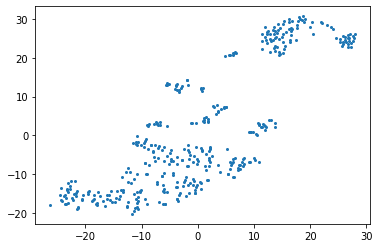

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], s=4)
plt.figure()

#### Задание 2

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmodel = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [16]:
labels_train = kmodel.fit_predict(X_train_scaled)

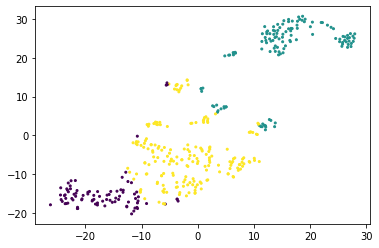

In [23]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], s=4, c=labels_train)
plt.show()

In [18]:
for i in range(len(np.unique(labels_train))):
    print(f'Средний CRIM кластера {i}: ', X_train[labels_train == i]['CRIM'].mean())
    print(f'Средняя цена кластера {i}: ', y_train[labels_train == i]['price'].mean())

Средний CRIM кластера 0:  0.07356558139534886
Средняя цена кластера 0:  27.788372093023252
Средний CRIM кластера 1:  10.797028425196853
Средняя цена кластера 1:  16.165354330708666
Средний CRIM кластера 2:  0.42166020942408367
Средняя цена кластера 2:  24.958115183246072


#### Задание 3*

In [19]:
labels_test = kmodel.fit_predict(X_test_scaled)

In [20]:
for i in range(len(np.unique(labels_test))):
    print(f'Средний CRIM кластера {i}: ', X_test[labels_test == i]['CRIM'].mean())
    print(f'Средняя цена кластера {i}: ', y_test[labels_test == i]['price'].mean())

Средний CRIM кластера 0:  0.08308461538461537
Средняя цена кластера 0:  34.55384615384615
Средний CRIM кластера 1:  9.419181842105264
Средняя цена кластера 1:  16.710526315789473
Средний CRIM кластера 2:  0.22250117647058823
Средняя цена кластера 2:  21.71764705882353
